In [2]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
backend = Aer.get_backend('qasm_simulator')

# Regularized Feature Map

## Regularization

In [4]:
np.random.seed(42)

n = 200
n_features = 4
epochs = 100
x = np.random.uniform(0, np.pi, (n, n_features))

y = np.sin(2*x[:,2])
y = scaler(y, a=0.1, b=0.9).reshape(-1, 1)

x_train, y_train = x[:100,:], y[:100,:]

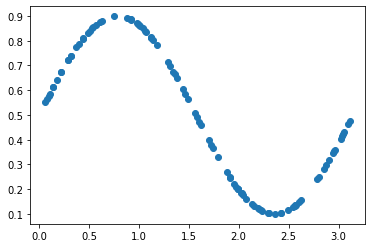

In [5]:
plt.plot(x_train[:,2], y_train,"o")
plt.show()

### No Penalty

In [5]:
np.random.seed(42)
model_list = []
for i in tqdm(range(5)):
    optimizer = Adam(lr=0.1)
    model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=2,
                             alpha=0.00,
                             backend=backend, 
                             shots=10000, 
                             optimizer=optimizer)
    
    model.train(x_train, y_train, epochs=epochs, verbose=True) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("sparse_reg_model_no_penalty"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09138601454219712
epoch: 1, loss: 0.07412890229727098
epoch: 2, loss: 0.07308813987854881
epoch: 3, loss: 0.07210081925861814
epoch: 4, loss: 0.06869263676824285
epoch: 5, loss: 0.0626464003480534
epoch: 6, loss: 0.05737644954548731
epoch: 7, loss: 0.051912753065810203
epoch: 8, loss: 0.04642565990559767
epoch: 9, loss: 0.04134601354370838
epoch: 10, loss: 0.03826831296481133
epoch: 11, loss: 0.035407312865711804
epoch: 12, loss: 0.03407475630776921
epoch: 13, loss: 0.03226816891696616
epoch: 14, loss: 0.03077835913779596
epoch: 15, loss: 0.028660245002737034
epoch: 16, loss: 0.026756283161953207
epoch: 17, loss: 0.02544573673682764
epoch: 18, loss: 0.024497279122335774
epoch: 19, loss: 0.023741035864832755
epoch: 20, loss: 0.023012098657432273
epoch: 21, loss: 0.023208484497091217
epoch: 22, loss: 0.022707553458304046
epoch: 23, loss: 0.02255540649552537
epoch: 24, loss: 0.022121150104210438
epoch: 25, loss: 0.02183383150262536
epoch: 26, loss: 0.021442398381498185
e

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07755543521250739
epoch: 1, loss: 0.07898924592430542
epoch: 2, loss: 0.07803508074456654
epoch: 3, loss: 0.07835827615154481
epoch: 4, loss: 0.07829733047011203
epoch: 5, loss: 0.0783832058349037
epoch: 6, loss: 0.07765203373565781
epoch: 7, loss: 0.07756572621246166
epoch: 8, loss: 0.07658880170928024
epoch: 9, loss: 0.07544957331119095
epoch: 10, loss: 0.07283552417966328
epoch: 11, loss: 0.0671170156274058
epoch: 12, loss: 0.059900998431559785
epoch: 13, loss: 0.05071515182348048
epoch: 14, loss: 0.04080730434314634
epoch: 15, loss: 0.032171762073475885
epoch: 16, loss: 0.026153195989372956
epoch: 17, loss: 0.023698469980999906
epoch: 18, loss: 0.024000004766151054
epoch: 19, loss: 0.02449901879406543
epoch: 20, loss: 0.024620815056843295
epoch: 21, loss: 0.02397441067531845
epoch: 22, loss: 0.024250675121481016
epoch: 23, loss: 0.024108978138576483
epoch: 24, loss: 0.023774518205438903
epoch: 25, loss: 0.023858910547586314
epoch: 26, loss: 0.02381781381348391
epo

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07839340368613873
epoch: 1, loss: 0.07844311323160079
epoch: 2, loss: 0.07794091631755601
epoch: 3, loss: 0.07452737460390661
epoch: 4, loss: 0.06745184190338976
epoch: 5, loss: 0.05915808880854817
epoch: 6, loss: 0.049973018514992945
epoch: 7, loss: 0.04024581163799439
epoch: 8, loss: 0.031614167874071966
epoch: 9, loss: 0.02688833201261381
epoch: 10, loss: 0.024980325945665217
epoch: 11, loss: 0.024386278864638986
epoch: 12, loss: 0.02446428423125502
epoch: 13, loss: 0.02484726426556413
epoch: 14, loss: 0.02487897920542357
epoch: 15, loss: 0.025167758892147295
epoch: 16, loss: 0.02492297294506501
epoch: 17, loss: 0.024982348676629833
epoch: 18, loss: 0.024180391993616882
epoch: 19, loss: 0.02335215564247154
epoch: 20, loss: 0.02213205857075222
epoch: 21, loss: 0.020997409111074505
epoch: 22, loss: 0.01929400207573055
epoch: 23, loss: 0.017999109448537318
epoch: 24, loss: 0.016707523455849912
epoch: 25, loss: 0.015547844565509226
epoch: 26, loss: 0.014243545823583217

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.08408147940983962
epoch: 1, loss: 0.07413200625817244
epoch: 2, loss: 0.07136427544672286
epoch: 3, loss: 0.06578555845535275
epoch: 4, loss: 0.056282911148642215
epoch: 5, loss: 0.04567182190918926
epoch: 6, loss: 0.036412579849136414
epoch: 7, loss: 0.02926508955499073
epoch: 8, loss: 0.02529381721688789
epoch: 9, loss: 0.02331955267455863
epoch: 10, loss: 0.023377489793691884
epoch: 11, loss: 0.024035940077145764
epoch: 12, loss: 0.02402158849617017
epoch: 13, loss: 0.023590363253986793
epoch: 14, loss: 0.023145459791411402
epoch: 15, loss: 0.023185479765079432
epoch: 16, loss: 0.02340042389474609
epoch: 17, loss: 0.0231727355810321
epoch: 18, loss: 0.0221131742737612
epoch: 19, loss: 0.02114937569791745
epoch: 20, loss: 0.020099703405119147
epoch: 21, loss: 0.01894440148152402
epoch: 22, loss: 0.01778782120660192
epoch: 23, loss: 0.01673184845344175
epoch: 24, loss: 0.015404185177462624
epoch: 25, loss: 0.014809571561541182
epoch: 26, loss: 0.014552518803951187
ep

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.08011645599504766
epoch: 1, loss: 0.08014336718875478
epoch: 2, loss: 0.07935787845678549
epoch: 3, loss: 0.07807768955010472
epoch: 4, loss: 0.07681893275422026
epoch: 5, loss: 0.07677067653465927
epoch: 6, loss: 0.07464385839767308
epoch: 7, loss: 0.07155063601271286
epoch: 8, loss: 0.06515763748152342
epoch: 9, loss: 0.05745304591532841
epoch: 10, loss: 0.04809503039936795
epoch: 11, loss: 0.04019860959760609
epoch: 12, loss: 0.03304263296481841
epoch: 13, loss: 0.027981772509075614
epoch: 14, loss: 0.02577022233974173
epoch: 15, loss: 0.025004215474637236
epoch: 16, loss: 0.025342991503219787
epoch: 17, loss: 0.025933939158074338
epoch: 18, loss: 0.025896414403674402
epoch: 19, loss: 0.02473954722251437
epoch: 20, loss: 0.023273172666428844
epoch: 21, loss: 0.02365461666300797
epoch: 22, loss: 0.024281842734839083
epoch: 23, loss: 0.023923428267733478
epoch: 24, loss: 0.02247282480462841
epoch: 25, loss: 0.020922741004237952
epoch: 26, loss: 0.02087951141922459
ep

### Low penalty

In [6]:
np.random.seed(42)
model_list = []
for i in tqdm(range(5)):
    optimizer = Adam(lr=0.1)
    model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=2,
                             alpha=0.01,
                             backend=backend, 
                             shots=10000, 
                             optimizer=optimizer)
    
    model.train(x_train, y_train, epochs=epochs, verbose=True) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("sparse_reg_model_low_penalty"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0912111809862965
epoch: 1, loss: 0.0736207689582723
epoch: 2, loss: 0.07270909046177425
epoch: 3, loss: 0.07194822105512512
epoch: 4, loss: 0.06815248917462827
epoch: 5, loss: 0.06294284469467866
epoch: 6, loss: 0.05720395906901414
epoch: 7, loss: 0.051666950725747104
epoch: 8, loss: 0.046848182464445776
epoch: 9, loss: 0.041960730025917325
epoch: 10, loss: 0.03815544879078301
epoch: 11, loss: 0.036436188634337355
epoch: 12, loss: 0.03437704302116006
epoch: 13, loss: 0.03283523146909727
epoch: 14, loss: 0.03022467866415468
epoch: 15, loss: 0.028812512708924223
epoch: 16, loss: 0.02762698230303138
epoch: 17, loss: 0.025818157636144402
epoch: 18, loss: 0.02470180729315303
epoch: 19, loss: 0.023437685861888834
epoch: 20, loss: 0.02289734933122251
epoch: 21, loss: 0.022615581568303136
epoch: 22, loss: 0.022485885888361007
epoch: 23, loss: 0.021904360122739476
epoch: 24, loss: 0.021622181110506844
epoch: 25, loss: 0.021439750463868718
epoch: 26, loss: 0.0209147956199401
ep

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07801883071123084
epoch: 1, loss: 0.07969688101738953
epoch: 2, loss: 0.07801790151658698
epoch: 3, loss: 0.07836712479732359
epoch: 4, loss: 0.07810029950533587
epoch: 5, loss: 0.0784370544343546
epoch: 6, loss: 0.0771768162876865
epoch: 7, loss: 0.07557907225636006
epoch: 8, loss: 0.07309882593787094
epoch: 9, loss: 0.0687861336627529
epoch: 10, loss: 0.061601913619995355
epoch: 11, loss: 0.05330773495973371
epoch: 12, loss: 0.04388221159514983
epoch: 13, loss: 0.03429018556098216
epoch: 14, loss: 0.02806542896036278
epoch: 15, loss: 0.025010583611541386
epoch: 16, loss: 0.023584784321567492
epoch: 17, loss: 0.024343246147641037
epoch: 18, loss: 0.024472703517924976
epoch: 19, loss: 0.023512695428409357
epoch: 20, loss: 0.02317100807525331
epoch: 21, loss: 0.024647568071516184
epoch: 22, loss: 0.024282050625837923
epoch: 23, loss: 0.02307259936408263
epoch: 24, loss: 0.021519856248981336
epoch: 25, loss: 0.020732415610910195
epoch: 26, loss: 0.020233680213818946
epo

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07788342382714773
epoch: 1, loss: 0.07859366314037336
epoch: 2, loss: 0.0776270702161868
epoch: 3, loss: 0.07430525522563305
epoch: 4, loss: 0.06903320951139345
epoch: 5, loss: 0.06125133012348804
epoch: 6, loss: 0.05232205288962175
epoch: 7, loss: 0.04206238321744569
epoch: 8, loss: 0.034137033507541215
epoch: 9, loss: 0.027744431759097972
epoch: 10, loss: 0.024810006466561254
epoch: 11, loss: 0.02315493933893976
epoch: 12, loss: 0.02334593687566978
epoch: 13, loss: 0.02365859178627828
epoch: 14, loss: 0.023920854989017828
epoch: 15, loss: 0.023676053765957848
epoch: 16, loss: 0.022635114945966272
epoch: 17, loss: 0.021887025593406984
epoch: 18, loss: 0.02050936965958566
epoch: 19, loss: 0.01934279107245255
epoch: 20, loss: 0.01778681010278033
epoch: 21, loss: 0.016531539962411315
epoch: 22, loss: 0.015053194289602816
epoch: 23, loss: 0.013695216260011224
epoch: 24, loss: 0.012004363127650882
epoch: 25, loss: 0.010969857050999144
epoch: 26, loss: 0.010004943544518793

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.08413782933919756
epoch: 1, loss: 0.07370087779587146
epoch: 2, loss: 0.07080879778600453
epoch: 3, loss: 0.06514399239428584
epoch: 4, loss: 0.05527034348655549
epoch: 5, loss: 0.04510897599755755
epoch: 6, loss: 0.037078715774539445
epoch: 7, loss: 0.02980741297446123
epoch: 8, loss: 0.025165516748476783
epoch: 9, loss: 0.02320349751316677
epoch: 10, loss: 0.023267934692269385
epoch: 11, loss: 0.02377337002954813
epoch: 12, loss: 0.024576587574536752
epoch: 13, loss: 0.02463562334108752
epoch: 14, loss: 0.02465308471434887
epoch: 15, loss: 0.024775996804107324
epoch: 16, loss: 0.02498580523768531
epoch: 17, loss: 0.025165963533120946
epoch: 18, loss: 0.02443753481035102
epoch: 19, loss: 0.023976322074991323
epoch: 20, loss: 0.023850429740219607
epoch: 21, loss: 0.02359836237929438
epoch: 22, loss: 0.023218765701409145
epoch: 23, loss: 0.022946943553071048
epoch: 24, loss: 0.0223994124012513
epoch: 25, loss: 0.022022224576726396
epoch: 26, loss: 0.021649326140072422


  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07952015766715566
epoch: 1, loss: 0.07966027421085005
epoch: 2, loss: 0.07859029930408797
epoch: 3, loss: 0.07768706285747237
epoch: 4, loss: 0.07723647242639121
epoch: 5, loss: 0.07620496109677653
epoch: 6, loss: 0.07545790154602078
epoch: 7, loss: 0.07173567409677782
epoch: 8, loss: 0.06616428004069552
epoch: 9, loss: 0.058751247124333016
epoch: 10, loss: 0.05058402060049065
epoch: 11, loss: 0.041538733162568856
epoch: 12, loss: 0.03430282919585444
epoch: 13, loss: 0.029235764002144338
epoch: 14, loss: 0.026187810294410845
epoch: 15, loss: 0.02486130611097334
epoch: 16, loss: 0.024676980161625638
epoch: 17, loss: 0.025279860992129744
epoch: 18, loss: 0.025040150356834406
epoch: 19, loss: 0.024204280189545516
epoch: 20, loss: 0.022696489640032253
epoch: 21, loss: 0.022052128127944815
epoch: 22, loss: 0.022773438810359745
epoch: 23, loss: 0.022110027990737056
epoch: 24, loss: 0.020229044636223485
epoch: 25, loss: 0.018455034514237065
epoch: 26, loss: 0.017721304646991

### No-Regularized Model

In [5]:
np.random.seed(42)
model_list = []
for i in tqdm(range(5)):
    optimizer = Adam(lr=0.1)
    model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=2,
                             alpha=0.00,
                             backend=backend, 
                             shots=10000, 
                             optimizer=optimizer)
    
    model.encoder.reg = False
    model.train(x_train, y_train, epochs=epochs, verbose=True) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("sparse_no_reg_model"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.10211732280895763
epoch: 1, loss: 0.09183818569966797
epoch: 2, loss: 0.0868851096325999
epoch: 3, loss: 0.08326088738501085
epoch: 4, loss: 0.08189231057026441
epoch: 5, loss: 0.07987453197541204
epoch: 6, loss: 0.07821337210679151
epoch: 7, loss: 0.07736914646216435
epoch: 8, loss: 0.0768827270114978
epoch: 9, loss: 0.07630719012933743
epoch: 10, loss: 0.07589670648474041
epoch: 11, loss: 0.07423415561679562
epoch: 12, loss: 0.07268630096325174
epoch: 13, loss: 0.06984031799367191
epoch: 14, loss: 0.06620846399253966
epoch: 15, loss: 0.0616987979463965
epoch: 16, loss: 0.0566351863829571
epoch: 17, loss: 0.04936988377876094
epoch: 18, loss: 0.04288857138643023
epoch: 19, loss: 0.03627198322260481
epoch: 20, loss: 0.031914371706206424
epoch: 21, loss: 0.029525483446038666
epoch: 22, loss: 0.028624862778655735
epoch: 23, loss: 0.0284355053458452
epoch: 24, loss: 0.028025898331686946
epoch: 25, loss: 0.02683070973565359
epoch: 26, loss: 0.025566075550554315
epoch: 27, 

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.08893594816299412
epoch: 1, loss: 0.08310969246705327
epoch: 2, loss: 0.07924603901807357
epoch: 3, loss: 0.07586534803765563
epoch: 4, loss: 0.07335117145678222
epoch: 5, loss: 0.0717449419853136
epoch: 6, loss: 0.0703588730857601
epoch: 7, loss: 0.07011628161083434
epoch: 8, loss: 0.0694887943028496
epoch: 9, loss: 0.06902504559196732
epoch: 10, loss: 0.06818332798202141
epoch: 11, loss: 0.06794884719639241
epoch: 12, loss: 0.0684339154200663
epoch: 13, loss: 0.0669608303365667
epoch: 14, loss: 0.06708641914144992
epoch: 15, loss: 0.06622019977862963
epoch: 16, loss: 0.06546252860062389
epoch: 17, loss: 0.06569418079024147
epoch: 18, loss: 0.06539230178007417
epoch: 19, loss: 0.06512229906522421
epoch: 20, loss: 0.0643860626577199
epoch: 21, loss: 0.0644740234163529
epoch: 22, loss: 0.06352997241875351
epoch: 23, loss: 0.06346258177154822
epoch: 24, loss: 0.06362133178249085
epoch: 25, loss: 0.06384421790051407
epoch: 26, loss: 0.06362235053740141
epoch: 27, loss: 0

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09010663418384732
epoch: 1, loss: 0.08288304763505983
epoch: 2, loss: 0.07800506299696745
epoch: 3, loss: 0.07502186037271341
epoch: 4, loss: 0.07426967660691274
epoch: 5, loss: 0.07381004328500512
epoch: 6, loss: 0.07461329372960096
epoch: 7, loss: 0.07384237250254118
epoch: 8, loss: 0.07445386685160987
epoch: 9, loss: 0.07400249699563653
epoch: 10, loss: 0.07371927543327883
epoch: 11, loss: 0.07349227650235657
epoch: 12, loss: 0.07340825992716182
epoch: 13, loss: 0.07286668479441595
epoch: 14, loss: 0.07150218581792675
epoch: 15, loss: 0.0704627549839958
epoch: 16, loss: 0.06938034081895336
epoch: 17, loss: 0.06812266973839208
epoch: 18, loss: 0.06659679039824976
epoch: 19, loss: 0.06421322802345171
epoch: 20, loss: 0.0609186412016254
epoch: 21, loss: 0.05468786055867631
epoch: 22, loss: 0.04547753235182649
epoch: 23, loss: 0.035058567817469403
epoch: 24, loss: 0.02730088457275023
epoch: 25, loss: 0.02571747928172591
epoch: 26, loss: 0.02831496818635911
epoch: 27, l

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09877541505689265
epoch: 1, loss: 0.0927218663251023
epoch: 2, loss: 0.0882350951705636
epoch: 3, loss: 0.08510672406893162
epoch: 4, loss: 0.08189067139774293
epoch: 5, loss: 0.07783844790988519
epoch: 6, loss: 0.0730511004677237
epoch: 7, loss: 0.06901769298026439
epoch: 8, loss: 0.064803219091191
epoch: 9, loss: 0.05921212822016106
epoch: 10, loss: 0.05309263266185876
epoch: 11, loss: 0.045230181516873774
epoch: 12, loss: 0.036723819102454563
epoch: 13, loss: 0.028686470860414075
epoch: 14, loss: 0.021510526847503687
epoch: 15, loss: 0.017470240126721718
epoch: 16, loss: 0.01607234580447906
epoch: 17, loss: 0.015373437936424534
epoch: 18, loss: 0.014438700915970305
epoch: 19, loss: 0.013224491246264085
epoch: 20, loss: 0.012224679052719258
epoch: 21, loss: 0.012049116152827288
epoch: 22, loss: 0.012529991766193323
epoch: 23, loss: 0.013120398120207108
epoch: 24, loss: 0.01328306133338099
epoch: 25, loss: 0.01314497692445576
epoch: 26, loss: 0.01295116063277761
epoc

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09283242855306549
epoch: 1, loss: 0.08255263122718726
epoch: 2, loss: 0.07670552266566895
epoch: 3, loss: 0.07391493292913077
epoch: 4, loss: 0.07365880171104096
epoch: 5, loss: 0.07346112409099653
epoch: 6, loss: 0.07220803099985097
epoch: 7, loss: 0.07080596665061019
epoch: 8, loss: 0.06851332004157647
epoch: 9, loss: 0.06659785391273472
epoch: 10, loss: 0.06427372494168782
epoch: 11, loss: 0.060366996373449784
epoch: 12, loss: 0.055355799451166136
epoch: 13, loss: 0.05070019035512103
epoch: 14, loss: 0.044447572174383075
epoch: 15, loss: 0.037662148403059204
epoch: 16, loss: 0.0312839841740844
epoch: 17, loss: 0.025538544178492276
epoch: 18, loss: 0.021280252374386674
epoch: 19, loss: 0.019089370193905227
epoch: 20, loss: 0.017748304826834094
epoch: 21, loss: 0.017445447532387887
epoch: 22, loss: 0.01617256082709907
epoch: 23, loss: 0.01568731382151334
epoch: 24, loss: 0.014864787478995375
epoch: 25, loss: 0.013944919552301155
epoch: 26, loss: 0.013189796294951778


### Dense Input

In [ ]:
x_train[:,0] = np.pi/2
x_train[:,1] = np.pi/2
x_train[:,3] = np.pi/2

np.random.seed(42)
model_list = []
for i in tqdm(range(5)):
    optimizer = Adam(lr=0.1)
    model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=2,
                             alpha=0.00,
                             backend=backend, 
                             shots=10000, 
                             optimizer=optimizer)
    
    model.encoder.reg = False
    model.train(x_train, y_train, epochs=epochs, verbose=True) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("dense_no_reg_model"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.10768445764328853
epoch: 1, loss: 0.07275653584351174
epoch: 2, loss: 0.05503904011586421
epoch: 3, loss: 0.042727240368448875
epoch: 4, loss: 0.030504287830210988
epoch: 5, loss: 0.019739248766056466
epoch: 6, loss: 0.012513278424168764
epoch: 7, loss: 0.00806092260661267
epoch: 8, loss: 0.005433507571530303
epoch: 9, loss: 0.004325742017592506
epoch: 10, loss: 0.003470964286259513
epoch: 11, loss: 0.002871360221724063
epoch: 12, loss: 0.0023123500198791317
epoch: 13, loss: 0.0018537771556348143
epoch: 14, loss: 0.0016727679200081484
epoch: 15, loss: 0.0018650429771288465
epoch: 16, loss: 0.0020359104879063643
epoch: 17, loss: 0.0020930731307492447
epoch: 18, loss: 0.0019529470004306495
epoch: 19, loss: 0.0017700573941558276
epoch: 20, loss: 0.0017171917864471486
epoch: 21, loss: 0.0017113342603668278
epoch: 22, loss: 0.0016695241183468448
epoch: 23, loss: 0.0014259033771052635
epoch: 24, loss: 0.0009753969723934896
epoch: 25, loss: 0.0006757335646261843
epoch: 26, l

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.12776272125686203
epoch: 1, loss: 0.09047255492145151
epoch: 2, loss: 0.06877528463900046
epoch: 3, loss: 0.05648955913516123
epoch: 4, loss: 0.045362091414223274
epoch: 5, loss: 0.03336079748451856
epoch: 6, loss: 0.021677709535084157
epoch: 7, loss: 0.013084023644144993
epoch: 8, loss: 0.007700821893016966
epoch: 9, loss: 0.0061740997823628765
epoch: 10, loss: 0.006884157281181647
epoch: 11, loss: 0.007786245992172591
epoch: 12, loss: 0.006942165219423963
epoch: 13, loss: 0.005113895918619954
epoch: 14, loss: 0.0025607986514978526
epoch: 15, loss: 0.0006621032529558218
epoch: 16, loss: 5.209822395599787e-05
epoch: 17, loss: 0.0008153798183187653
epoch: 18, loss: 0.0021823356553514225
epoch: 19, loss: 0.003028492113773602
epoch: 20, loss: 0.002964134751152146
epoch: 21, loss: 0.002242062956778287
epoch: 22, loss: 0.0011648043774351296
epoch: 23, loss: 0.00038411281740788485
epoch: 24, loss: 9.203485101642205e-05
epoch: 25, loss: 0.0003404083346075308
epoch: 26, loss:

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.05161216541507968
epoch: 1, loss: 0.02550141830457466
epoch: 2, loss: 0.010536772891062259
epoch: 3, loss: 0.002778467865350839
epoch: 4, loss: 0.0002625146623551137
epoch: 5, loss: 0.0004381635180700302
epoch: 6, loss: 0.0011850197111501926
epoch: 7, loss: 0.0012127911709195127
epoch: 8, loss: 0.0008789875110498573
epoch: 9, loss: 0.0007959226591689408
epoch: 10, loss: 0.0010746262649939846
epoch: 11, loss: 0.0010316386109123193
epoch: 12, loss: 0.0006623006568821093
epoch: 13, loss: 0.00039518061323825577
epoch: 14, loss: 0.0004532642749829232
epoch: 15, loss: 0.0007025562174335792
epoch: 16, loss: 0.0007409444131065576
epoch: 17, loss: 0.0004326510504288205
epoch: 18, loss: 0.00015680983678382728
epoch: 19, loss: 3.29833861033767e-05
epoch: 20, loss: 0.00011866453401419966
epoch: 21, loss: 0.0002546787440086091
epoch: 22, loss: 0.00032847670761799617
epoch: 23, loss: 0.00025879247331138177
epoch: 24, loss: 0.00013092772963359532
epoch: 25, loss: 7.112178314450474e-

### Alternative Data

In [19]:
np.random.seed(42)

n = 200
n_features = 4
epochs = 100
x = np.random.uniform(0, 1, (n, n_features))

y = -gaussian(x[:,2].reshape(-1,1), 0.2, 0.01) + gaussian(x[:,2].reshape(-1,1), 0.5, 0.02) - gaussian(x[:,2].reshape(-1,1), 0.8, 0.01) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)

x_train, y_train = x[:100,:], y[:100,:]

x_train[:,0] = np.pi/2
x_train[:,1] = np.pi/2
x_train[:,3] = np.pi/2

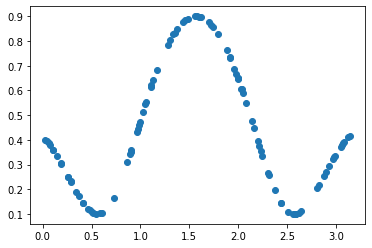

In [20]:
plt.plot(x_train[:,2], y_train, "o")

In [22]:
optimizer = Adam(lr=0.1)
model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=2,
                             alpha=0.00,
                             backend=backend, 
                             shots=10000, 
                             optimizer=optimizer)
    
model.encoder.reg = False
model.train(x_train, y_train, epochs=epochs, verbose=True) 

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07010439938315038
epoch: 1, loss: 0.06417703168984619
epoch: 2, loss: 0.0637701954653251
epoch: 3, loss: 0.0627859736108793
epoch: 4, loss: 0.06119073174377905
epoch: 5, loss: 0.0583120683919079
epoch: 6, loss: 0.054030508653060985
epoch: 7, loss: 0.049880394656081205
epoch: 8, loss: 0.04709510893741544
epoch: 9, loss: 0.04308720745331316
epoch: 10, loss: 0.0397028963836519
epoch: 11, loss: 0.037313584163025645
epoch: 12, loss: 0.035222820645219956
epoch: 13, loss: 0.03314572444081112
epoch: 14, loss: 0.03147954632655843
epoch: 15, loss: 0.029526322398561497
epoch: 16, loss: 0.028462326514156054
epoch: 17, loss: 0.026711108906601586
epoch: 18, loss: 0.025812384818126338
epoch: 19, loss: 0.024986153714176257
epoch: 20, loss: 0.024145587702151833
epoch: 21, loss: 0.023793497678624608
epoch: 22, loss: 0.02395881468179138
epoch: 23, loss: 0.024098559159076393
epoch: 24, loss: 0.0240971263692222
epoch: 25, loss: 0.0237515608277706
epoch: 26, loss: 0.02388762705987439
epoch

In [24]:
y_pred3 = model.predict(x_train)

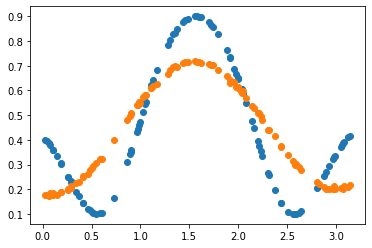

In [29]:
plt.plot(x_train[:,2], y_train, "o")
plt.plot(x_train[:,2], y_pred3, "o")
plt.show()